## EDA

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv('../data/cleaned_players.csv', index_col = 0)

In [85]:
df.head()


,id_players,player_name,birthday,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,76.0,left,high,medium,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
47,3,Aaron Doran,1991-05-13 00:00:00,170.18,163,71.0,78.0,right,medium,medium,...,72.0,63.0,22.0,21.0,21.0,15.0,10.0,11.0,8.0,12.0
83,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198,75.0,82.0,right,medium,high,...,54.0,60.0,80.0,78.0,70.0,14.0,11.0,65.0,11.0,10.0
106,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154,78.0,81.0,right,medium,medium,...,60.0,81.0,82.0,83.0,77.0,12.0,20.0,57.0,20.0,20.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9844 entries, 0 to 183972
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_players           9844 non-null   int64  
 1   player_name          9844 non-null   object 
 2   birthday             9844 non-null   object 
 3   height               9844 non-null   float64
 4   weight               9844 non-null   int64  
 5   overall_rating       9844 non-null   float64
 6   potential            9844 non-null   float64
 7   preferred_foot       9844 non-null   object 
 8   attacking_work_rate  9844 non-null   object 
 9   defensive_work_rate  9844 non-null   object 
 10  crossing             9844 non-null   float64
 11  finishing            9844 non-null   float64
 12  heading_accuracy     9844 non-null   float64
 13  short_passing        9844 non-null   float64
 14  volleys              9844 non-null   float64
 15  dribbling            9844 non-null   floa

In [87]:
df.columns # Show column names

Index(['id_players', 'player_name', 'birthday', 'height', 'weight',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [88]:
df.isnull().sum() # Check for missing values

id_players             0
player_name            0
birthday               0
height                 0
weight                 0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0


We have no null values in the dataset after cleaning.

In [89]:
# Mapping dictionaries
foot_mapping = {
    'left': 0,
    'right': 1
}

workrate_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

# Convert the columns
df['preferred_foot'] = df['preferred_foot'].replace(foot_mapping)
df['attacking_work_rate'] = df['attacking_work_rate'].replace(workrate_mapping) 
df['defensive_work_rate'] = df['defensive_work_rate'].replace(workrate_mapping)

# Verify the changes
print(df[['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']].head())

     preferred_foot attacking_work_rate defensive_work_rate
0                 1                   1                   1
5                 0                   2                   1
47                1                   1                   1
83                1                   1                   2
106               1                   1                   1


/var/folders/gr/q7qsw30x1xqd0zv1tj58r0vw0000gn/T/ipykernel_99712/2024176341.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['preferred_foot'] = df['preferred_foot'].replace(foot_mapping)


Here I changed the pereferred_foot, defensive_work_rate and attacking_work_rate columns to numerical values so that I can perform EDA on them

In [90]:
# Convert birthday to datetime if not already
df['birthday'] = pd.to_datetime(df['birthday'])

# Extract year
df['birth_year'] = df['birthday'].dt.year

# Calculate age (as of 2024)
current_year = 2024
df['age'] = current_year - df['birth_year']

# Drop original birthday column if no longer needed
df = df.drop('birthday', axis=1)

# Verify changes
print(df[['birth_year', 'age']].head())

     birth_year  age
0          1992   32
5          1989   35
47         1991   33
83         1982   42
106        1979   45


I added a column called age using birthday to perform eda on players age

In [91]:
df.head()

,id_players,player_name,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birth_year,age
0,1,Aaron Appindangoye,182.88,187,67.0,71.0,1,1,1,49.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1992,32
5,2,Aaron Cresswell,170.18,146,74.0,76.0,0,2,1,80.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,1989,35
47,3,Aaron Doran,170.18,163,71.0,78.0,1,1,1,73.0,...,22.0,21.0,21.0,15.0,10.0,11.0,8.0,12.0,1991,33
83,4,Aaron Galindo,182.88,198,75.0,82.0,1,1,2,60.0,...,80.0,78.0,70.0,14.0,11.0,65.0,11.0,10.0,1982,42
106,5,Aaron Hughes,182.88,154,78.0,81.0,1,1,1,45.0,...,82.0,83.0,77.0,12.0,20.0,57.0,20.0,20.0,1979,45


## Visualize the data

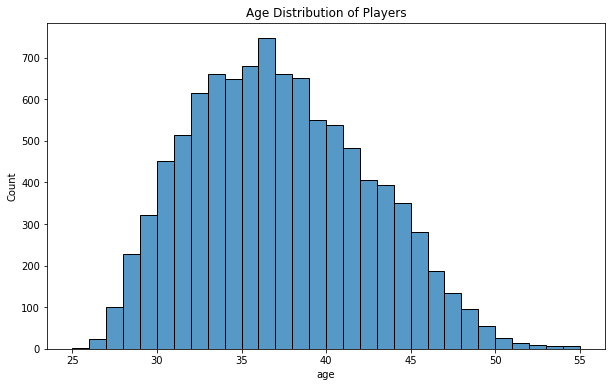

In [95]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution of Players')
plt.show()

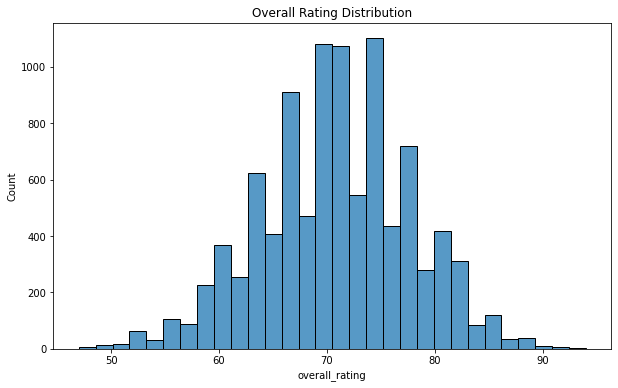

In [97]:
# Overall rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='overall_rating', bins=30)
plt.title('Overall Rating Distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of Preferred Foot')

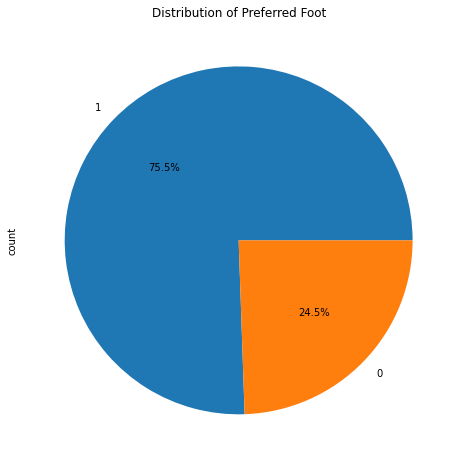

In [98]:
plt.figure(figsize=(8,8))
df['preferred_foot'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Preferred Foot')

Text(0.5, 1.0, 'Player Height vs Weight Distribution')

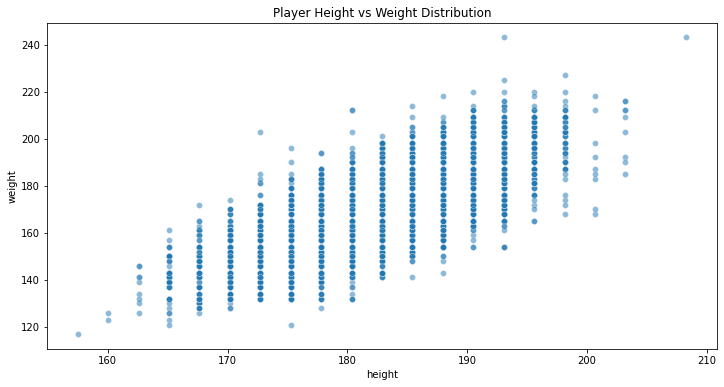

In [101]:
# Height vs Weight Distribution
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='height', y='weight', alpha=0.5)
plt.title('Player Height vs Weight Distribution')

Text(0.5, 1.0, 'Distribution of Physical Attributes')

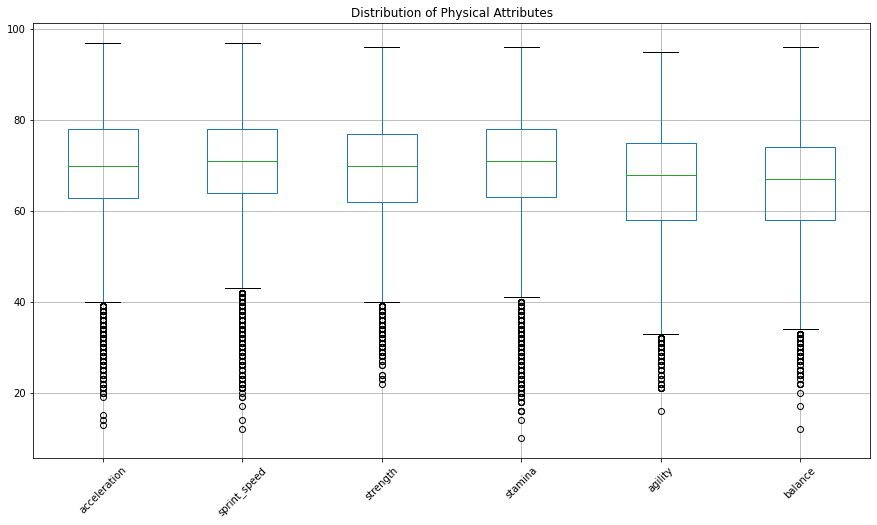

In [102]:
# Physical Attributes Distribution
physical_attrs = ['acceleration', 'sprint_speed', 'strength', 'stamina', 'agility', 'balance']
plt.figure(figsize=(15,8))
df[physical_attrs].boxplot()
plt.xticks(rotation=45)
plt.title('Distribution of Physical Attributes')

Text(0.5, 1.0, 'Technical Skills by Overall Rating')

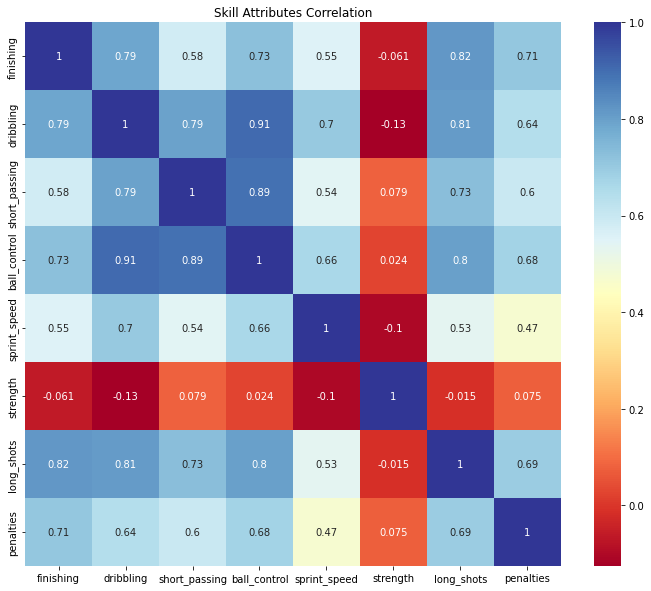

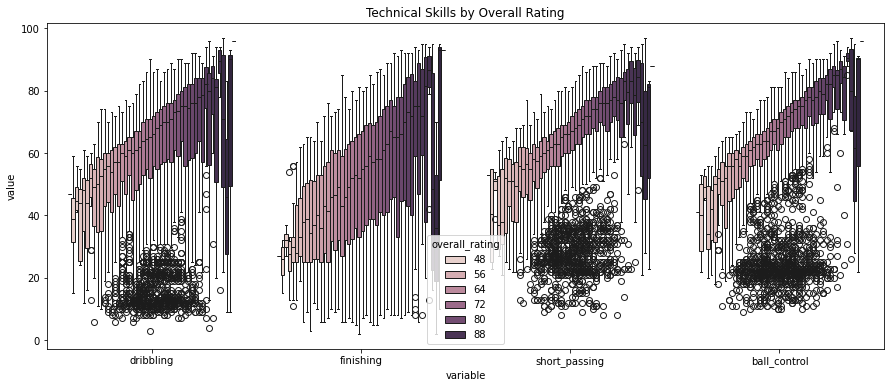

In [105]:
# Skill Correlation Matrix
skill_attrs = ['finishing', 'dribbling', 'short_passing', 'ball_control', 
               'sprint_speed', 'strength', 'long_shots', 'penalties']
plt.figure(figsize=(12,10))
sns.heatmap(df[skill_attrs].corr(), annot=True, cmap='RdYlBu')
plt.title('Skill Attributes Correlation')

# Overall Rating vs Technical Skills
plt.figure(figsize=(15,6))
technical_skills = ['dribbling', 'finishing', 'short_passing', 'ball_control']
df_melted = df.melt(id_vars=['overall_rating'], value_vars=technical_skills)
sns.boxplot(data=df_melted, x='variable', y='value', hue='overall_rating')
plt.title('Technical Skills by Overall Rating')

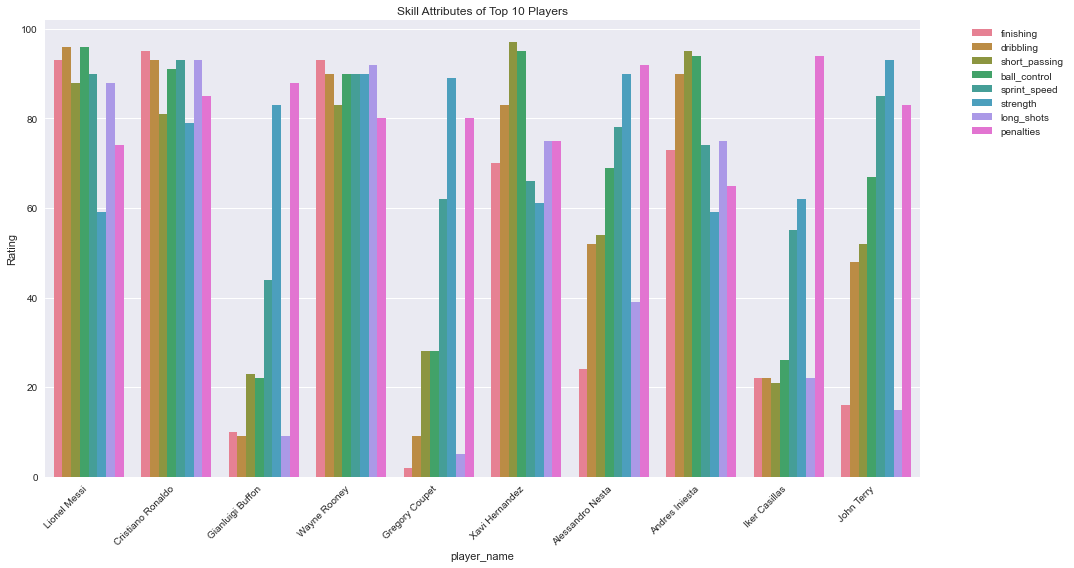

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 players and their skills
skill_columns = ['finishing', 'dribbling', 'short_passing', 'ball_control', 
                 'sprint_speed', 'strength', 'long_shots', 'penalties']

top_players = df.nlargest(10, 'overall_rating')[['player_name', 'overall_rating'] + skill_columns]

# Melt the dataframe for plotting
df_melted = top_players.melt(id_vars=['player_name', 'overall_rating'], 
                            value_vars=skill_columns,
                            var_name='Skill',
                            value_name='Rating')

# Create plot
plt.figure(figsize=(15, 8))
sns.barplot(data=df_melted, x='player_name', y='Rating', hue='Skill')
plt.xticks(rotation=45, ha='right')
plt.title('Skill Attributes of Top 10 Players')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

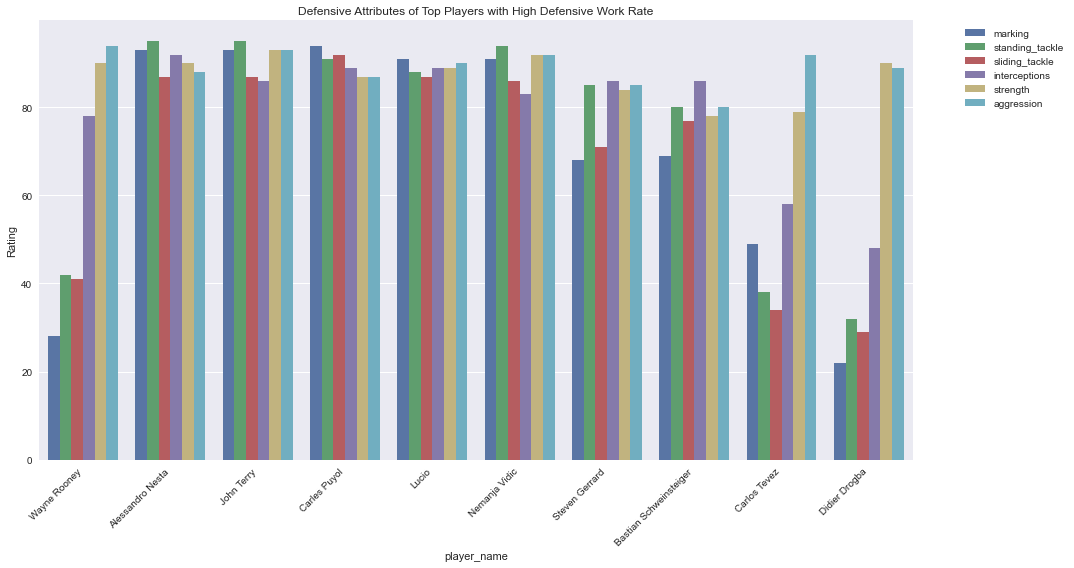


Top Defensive Players Stats:
                   player_name  overall_rating  marking  standing_tackle  \
178975            Wayne Rooney            93.0     28.0             42.0   
6531          Alessandro Nesta            91.0     93.0             95.0   
84874               John Terry            91.0     93.0             95.0   
25485             Carles Puyol            89.0     94.0             91.0   
105079                   Lucio            89.0     91.0             88.0   
131141           Nemanja Vidic            89.0     91.0             94.0   
167137          Steven Gerrard            89.0     68.0             85.0   
19616   Bastian Schweinsteiger            88.0     69.0             80.0   
26328             Carlos Tevez            88.0     49.0             38.0   
43445            Didier Drogba            88.0     22.0             32.0   

        sliding_tackle  interceptions  strength  aggression  
178975            41.0           78.0      90.0        94.0  
6531     

In [110]:
# Select defensive attributes
defensive_attrs = ['marking', 'standing_tackle', 'sliding_tackle', 
                  'interceptions', 'strength', 'aggression']

# Filter players with high defensive work rate
high_defensive = df[df['defensive_work_rate'] == 2]  # 2 represents 'high'

# Get top 10 defensive players by overall rating
top_defensive = high_defensive.nlargest(10, 'overall_rating')[['player_name', 'overall_rating'] + defensive_attrs]

# Create visualization
plt.figure(figsize=(15, 8))
df_melted = top_defensive.melt(id_vars=['player_name', 'overall_rating'], 
                              value_vars=defensive_attrs,
                              var_name='Attribute',
                              value_name='Rating')

sns.barplot(data=df_melted, x='player_name', y='Rating', hue='Attribute')
plt.title('Defensive Attributes of Top Players with High Defensive Work Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display numerical results
print("\nTop Defensive Players Stats:")
print(top_defensive)

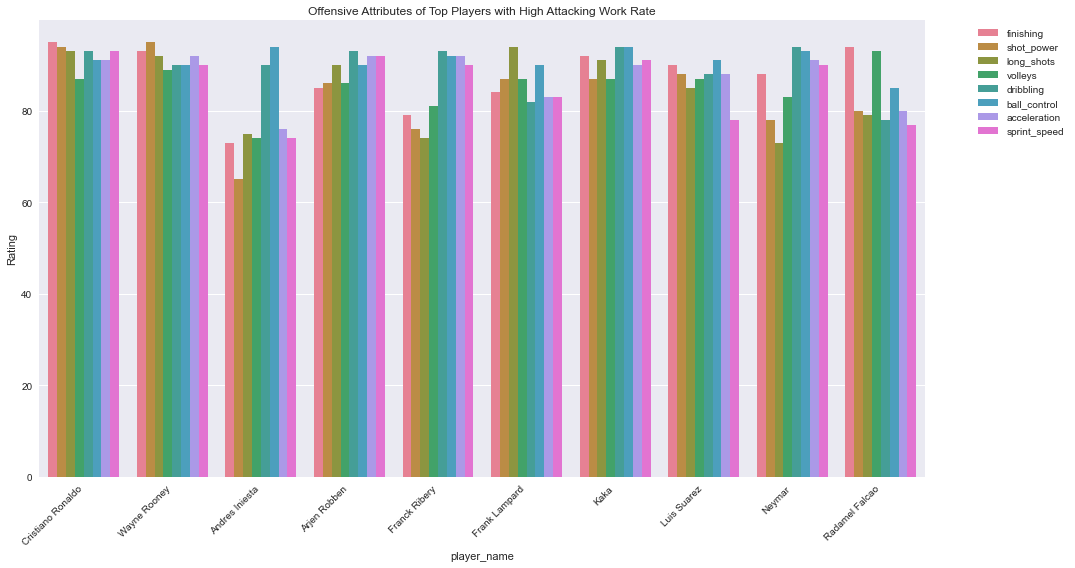


Top Attacking Players Stats:
              player_name  overall_rating  finishing  shot_power  long_shots  \
33330   Cristiano Ronaldo            93.0       95.0        94.0        93.0   
178975       Wayne Rooney            93.0       93.0        95.0        92.0   
12788      Andres Iniesta            91.0       73.0        65.0        75.0   
16461        Arjen Robben            90.0       85.0        86.0        90.0   
58695       Franck Ribery            90.0       79.0        76.0        74.0   
59279       Frank Lampard            90.0       84.0        87.0        94.0   
92760                Kaka            90.0       92.0        87.0        91.0   
105983        Luis Suarez            90.0       90.0        88.0        85.0   
131464             Neymar            90.0       88.0        78.0        73.0   
144924     Radamel Falcao            90.0       94.0        80.0        79.0   

        volleys  dribbling  ball_control  acceleration  sprint_speed  
33330      87.0   

In [111]:
# Select offensive attributes
offensive_attrs = ['finishing', 'shot_power', 'long_shots', 'volleys', 
                  'dribbling', 'ball_control', 'acceleration', 'sprint_speed']

# Filter players with high attacking work rate
high_attacking = df[df['attacking_work_rate'] == 2]  # 2 represents 'high'

# Get top 10 attacking players by overall rating
top_attacking = high_attacking.nlargest(10, 'overall_rating')[['player_name', 'overall_rating'] + offensive_attrs]

# Create visualization
plt.figure(figsize=(15, 8))
df_melted = top_attacking.melt(id_vars=['player_name', 'overall_rating'], 
                              value_vars=offensive_attrs,
                              var_name='Attribute',
                              value_name='Rating')

# Create bar plot
sns.barplot(data=df_melted, x='player_name', y='Rating', hue='Attribute')
plt.title('Offensive Attributes of Top Players with High Attacking Work Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display numerical results
print("\nTop Attacking Players Stats:")
print(top_attacking)